In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
# Define the tickers for the 11 GIC sectors and other indices
etf_tickers = {
    "GIC_Sector_1": "XLF",  # Example: Financials
    "GIC_Sector_2": "XLK",  # Example: Technology
    "GIC_Sector_3": "XLE",  # Example: Energy
    "GIC_Sector_4": "XLY",  # Example: Consumer Discretionary
    "GIC_Sector_5": "XLV",  # Example: Health Care
    "GIC_Sector_6": "XLP",  # Example: Consumer Staples
    "GIC_Sector_7": "XLI",  # Example: Industrials
    "GIC_Sector_8": "XLU",  # Example: Utilities
    "GIC_Sector_9": "XLB",  # Example: Materials
    "GIC_Sector_10": "XLRE", # Example: Real Estate
    "GIC_Sector_11": "XLC", # Example: Communication Services
    "Small_Cap": "IWM",      # Example: Small Cap ETF
    "Large_Cap": "SPY",      # Example: S&P 500 ETF
    "Growth": "VUG",         # Example: Growth ETF
    "Value": "VTV",          # Example: Value ETF
    "Momentum": "MTUM",      # Example: Momentum ETF
    "Carry": "DBV",          # Example: Carry ETF
    "Volatility": "VXX"      # Example: Volatility ETF
}

data = yf.download(list(etf_tickers.values()), period="max", progress=False)["Close"]
data

Ticker,DBV,IWM,MTUM,SPY,VTV,VUG,VXX,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,
1993-01-29,NaN,NaN,NaN,24.526077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,NaN,NaN,NaN,24.700516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN,24.752836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN,25.014503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN,25.119156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,NaN,226.500000,213.919998,599.369995,177.610001,412.929993,44.490002,89.050003,100.930000,90.360001,51.410000,139.179993,227.570007,80.010002,41.959999,77.650002,147.550003,231.320007
2025-01-28,NaN,226.750000,216.289993,604.520020,176.119995,422.140015,43.020000,88.760002,101.419998,89.500000,51.320000,138.259995,233.639999,78.760002,41.450001,76.580002,146.520004,231.600006
2025-01-29,NaN,226.229996,216.339996,601.809998,175.929993,419.380005,42.910000,88.599998,101.870003,89.699997,51.279999,137.789993,231.740005,78.949997,40.970001,76.739998,145.660004,230.940002


In [4]:
data.to_csv('raw_data.csv')

In [5]:
daily_returns = data.pct_change()
rolling_windows = {
    "Daily": 1,
    "Weekly": 5,
    "Monthly": 21,
    "Yearly": 252,
    "10_Year": 2520
}


results = {}

# Calculate average and median returns for each rolling window
for window_name, window_size in rolling_windows.items():
    avg_return = {}
    median_return = {}
    
    for ticker in daily_returns.columns:
        if len(daily_returns[ticker]) >= window_size:
            avg_return[ticker] = daily_returns[ticker].rolling(window=window_size).mean().mean()
            median_return[ticker] = daily_returns[ticker].rolling(window=window_size).median().median()
        else:
            avg_return[ticker] = np.nan
            median_return[ticker] = np.nan

    results[window_name] = {
        "Average": avg_return,
        "Median": median_return
    }

final_results = {
    "Window": [],
    "Ticker": [],
    "Average Return": [],
    "Median Return": []
}

for window_name, stats in results.items():
    for ticker in stats["Average"].keys():
        final_results["Window"].append(window_name)
        final_results["Ticker"].append(ticker)
        final_results["Average Return"].append(stats["Average"][ticker])
        final_results["Median Return"].append(stats["Median"][ticker])

final_results_df = pd.DataFrame(final_results)
final_results_df


/var/folders/h3/474ng92n1791h6nvhgftyjtw0000gn/T/ipykernel_3756/2591942992.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change()


,Window,Ticker,Average Return,Median Return
0,Daily,DBV,0.000011,0.000000
1,Daily,IWM,0.000424,0.001000
2,Daily,MTUM,0.000614,0.001105
3,Daily,SPY,0.000466,0.000677
4,Daily,VTV,0.000417,0.000746
...,...,...,...,...
85,10_Year,XLP,0.000372,0.000634
86,10_Year,XLRE,NaN,NaN
87,10_Year,XLU,0.000385,0.000975
88,10_Year,XLV,0.000425,0.000743


In [6]:
final_results_df.to_csv("returns_analysis_q1.csv", index=False)

In [7]:
def calculate_cagr(data, years):
    """
    Calculate CAGRs for specified time windows.

    Parameters:
    - data: DataFrame containing price data.
    - years: List of years (e.g., [1, 3, 5, 10]) to calculate CAGRs.

    Returns:
    - cagr_results: A dictionary of CAGRs for each year window.
    """
    trading_days_per_year = 252
    cagr_results = {year: pd.DataFrame(index=data.index) for year in years}

    for ticker in data.columns:
        for year in years:
            window_size = year * trading_days_per_year
            if len(data[ticker].dropna()) >= window_size:
                # Calculate the rolling CAGR
                cagr_results[year][ticker] = (
                    data[ticker]
                    .rolling(window=window_size)
                    .apply(lambda x: (x[-1] / x[0]) ** (1 / year) - 1, raw=False)
                )
            else:
                cagr_results[year][ticker] = pd.Series(index=data.index, dtype="float64")
    
    return cagr_results


years = [1, 3, 5, 10]
cagr_results = calculate_cagr(data, years)

for year, df in cagr_results.items():
    file_name = f"{year}_year_CAGR.csv"
    df.to_csv(file_name)


/var/folders/h3/474ng92n1791h6nvhgftyjtw0000gn/T/ipykernel_3756/2930106390.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .apply(lambda x: (x[-1] / x[0]) ** (1 / year) - 1, raw=False)
/var/folders/h3/474ng92n1791h6nvhgftyjtw0000gn/T/ipykernel_3756/2930106390.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .apply(lambda x: (x[-1] / x[0]) ** (1 / year) - 1, raw=False)
/var/folders/h3/474ng92n1791h6nvhgftyjtw0000gn/T/ipykernel_3756/2930106390.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Da

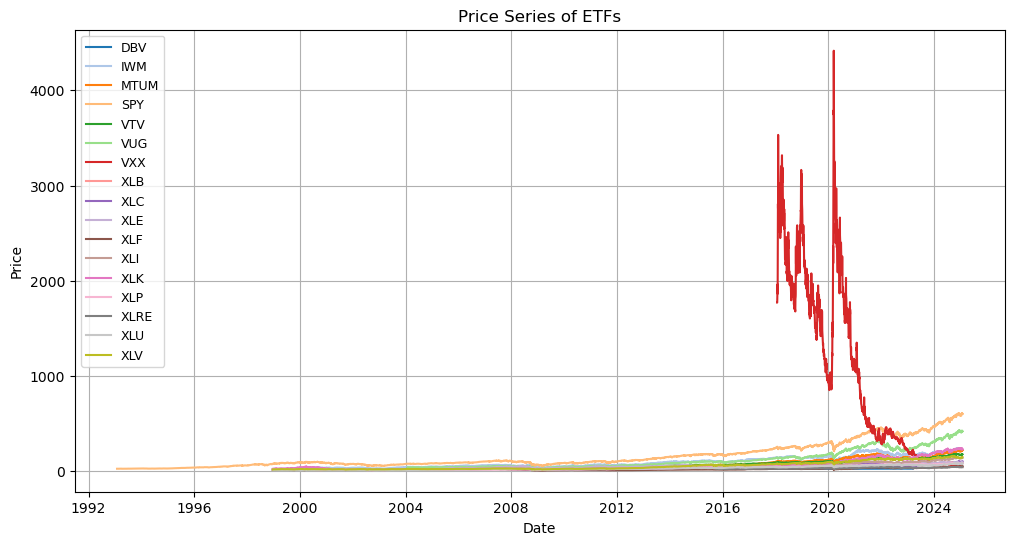

In [8]:
## q4 Plot all ETF price series on the same graph
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',  '#c7c7c7', '#bcbd22']
plt.figure(figsize=(12, 6))
for ticker, color in zip(data.columns, colors):
    plt.plot(data.index, data[ticker], label=ticker, color=color)

plt.title("Price Series of ETFs")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left", fontsize=9)
plt.grid()
plt.show()


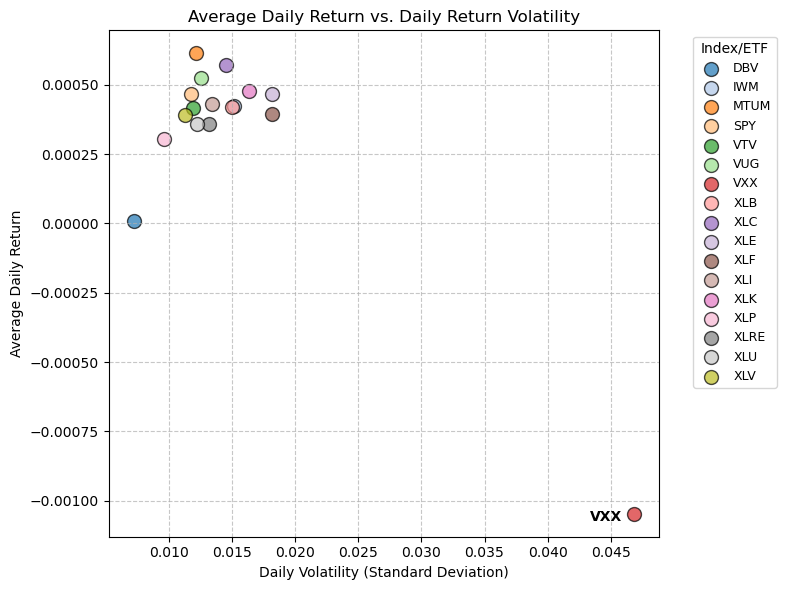

In [10]:
##q5 Scatter plot: Average Daily Return vs. Daily Return Volatility

avg_daily_return = daily_returns.mean()
daily_volatility = daily_returns.std()

scatter_df = pd.DataFrame({
    "ETF": avg_daily_return.index,
    "Average Daily Return": avg_daily_return.values,
    "Daily Volatility": daily_volatility.values
})

colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',  '#98df8a', '#d62728', '#ff9896', 
          '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22']

# Create scatter plot
plt.figure(figsize=(8, 6))

for (ticker, color) in zip(scatter_df["ETF"], colors):
    x, y = scatter_df.loc[scatter_df["ETF"] == ticker, "Daily Volatility"].values[0], \
           scatter_df.loc[scatter_df["ETF"] == ticker, "Average Daily Return"].values[0]
    
    plt.scatter(x, y, label=ticker, color=color, s=100, edgecolors='black', alpha=0.7)

    if ticker == "VXX":
        plt.annotate(ticker, (x, y), textcoords="offset points", xytext=(-20, -5), 
                     ha='center', fontsize=10, fontweight="bold", color="black")

plt.legend(title="Index/ETF", fontsize=9, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Average Daily Return vs. Daily Return Volatility")
plt.xlabel("Daily Volatility (Standard Deviation)")
plt.ylabel("Average Daily Return")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



In [12]:
# q6
mean_returns = daily_returns.mean()
median_returns = daily_returns.median()
diff = mean_returns - median_returns

print("Comparison of Mean vs Median Returns:")
print(pd.DataFrame({'Mean': mean_returns, 'Median': median_returns, 'Difference': diff}))


Comparison of Mean vs Median Returns:
            Mean    Median  Difference
Ticker                                
DBV     0.000011  0.000000    0.000011
IWM     0.000424  0.001000   -0.000576
MTUM    0.000614  0.001105   -0.000491
SPY     0.000466  0.000677   -0.000211
VTV     0.000417  0.000746   -0.000329
VUG     0.000525  0.000918   -0.000393
VXX    -0.001047 -0.007400    0.006353
XLB     0.000420  0.000730   -0.000310
XLC     0.000573  0.001140   -0.000567
XLE     0.000469  0.000694   -0.000225
XLF     0.000394  0.000559   -0.000166
XLI     0.000431  0.000844   -0.000413
XLK     0.000477  0.001022   -0.000545
XLP     0.000305  0.000473   -0.000168
XLRE    0.000359  0.000895   -0.000536
XLU     0.000359  0.000880   -0.000522
XLV     0.000391  0.000574   -0.000183
XLY     0.000483  0.000915   -0.000431


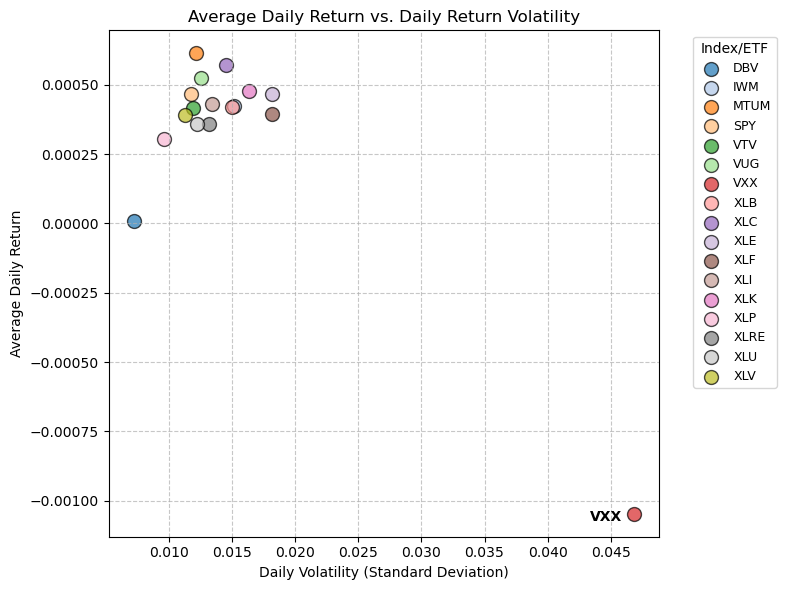

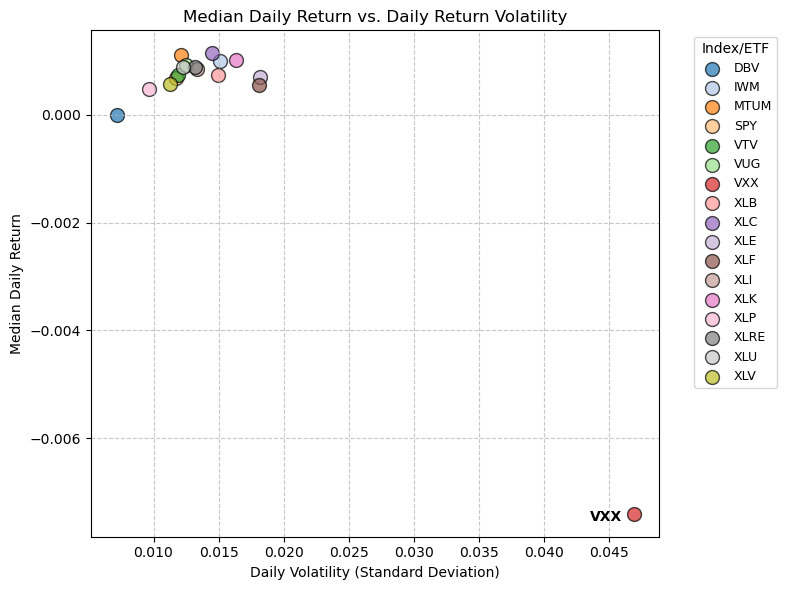

In [17]:
##q5 Scatter plot: Average Daily Return vs. Daily Return Volatility

avg_daily_return = daily_returns.mean()
median_daily_return = daily_returns.median()
daily_volatility = daily_returns.std()

scatter_df = pd.DataFrame({
    "ETF": avg_daily_return.index,
    "Average Daily Return": avg_daily_return.values,
    "Median Daily Return" : median_daily_return.values,
    "Daily Volatility": daily_volatility.values
})

colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',  '#98df8a', '#d62728', '#ff9896', 
          '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22']

plt.figure(figsize=(8, 6))

for (ticker, color) in zip(scatter_df["ETF"], colors):
    x, y = scatter_df.loc[scatter_df["ETF"] == ticker, "Daily Volatility"].values[0], \
           scatter_df.loc[scatter_df["ETF"] == ticker, "Average Daily Return"].values[0]
    
    plt.scatter(x, y, label=ticker, color=color, s=100, edgecolors='black', alpha=0.7)

    if ticker == "VXX":
        plt.annotate(ticker, (x, y), textcoords="offset points", xytext=(-20, -5), 
                     ha='center', fontsize=10, fontweight="bold", color="black")

plt.legend(title="Index/ETF", fontsize=9, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Average Daily Return vs. Daily Return Volatility")
plt.xlabel("Daily Volatility (Standard Deviation)")
plt.ylabel("Average Daily Return")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))

for (ticker, color) in zip(scatter_df["ETF"], colors):
    x, y = scatter_df.loc[scatter_df["ETF"] == ticker, "Daily Volatility"].values[0], \
           scatter_df.loc[scatter_df["ETF"] == ticker, "Median Daily Return"].values[0]
    
    plt.scatter(x, y, label=ticker, color=color, s=100, edgecolors='black', alpha=0.7)

    if ticker == "VXX":
        plt.annotate(ticker, (x, y), textcoords="offset points", xytext=(-20, -5), 
                     ha='center', fontsize=10, fontweight="bold", color="black")

plt.legend(title="Index/ETF", fontsize=9, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Median Daily Return vs. Daily Return Volatility")
plt.xlabel("Daily Volatility (Standard Deviation)")
plt.ylabel("Median Daily Return")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# q7
confidence_levels = [0.01, 0.05]
var_cvar_results = {}

for confidence in confidence_levels:
    var = daily_returns.quantile(confidence)
    cvar = daily_returns[daily_returns <= var].mean()
    var_cvar_results[f"VaR {int(confidence * 100)}%"] = var
    var_cvar_results[f"CVaR {int(confidence * 100)}%"] = cvar

var_cvar_df = pd.DataFrame(var_cvar_results)
var_cvar_df.to_csv("var_cvar_results.csv", index=True)
print(var_cvar_df)

          VaR 1%   CVaR 1%    VaR 5%   CVaR 5%
Ticker                                        
DBV    -0.021889 -0.032747 -0.010117 -0.018027
IWM    -0.038402 -0.056377 -0.023167 -0.034407
MTUM   -0.034979 -0.047907 -0.018150 -0.029421
SPY    -0.032152 -0.046591 -0.018104 -0.027941
VTV    -0.033285 -0.052164 -0.017081 -0.028989
VUG    -0.036860 -0.050034 -0.019245 -0.030449
VXX    -0.088038 -0.114987 -0.059123 -0.079587
XLB    -0.040618 -0.055333 -0.023077 -0.034351
XLC    -0.039473 -0.054155 -0.022020 -0.034626
XLE    -0.046804 -0.070233 -0.027538 -0.041576
XLF    -0.050563 -0.076210 -0.025049 -0.041987
XLI    -0.037191 -0.051597 -0.020498 -0.031540
XLK    -0.045861 -0.056922 -0.025926 -0.038046
XLP    -0.026989 -0.036753 -0.014513 -0.022399
XLRE   -0.036918 -0.055084 -0.018532 -0.030647
XLU    -0.033319 -0.046695 -0.018241 -0.028308
XLV    -0.030375 -0.043126 -0.017215 -0.026083
XLY    -0.038738 -0.053704 -0.022050 -0.033367


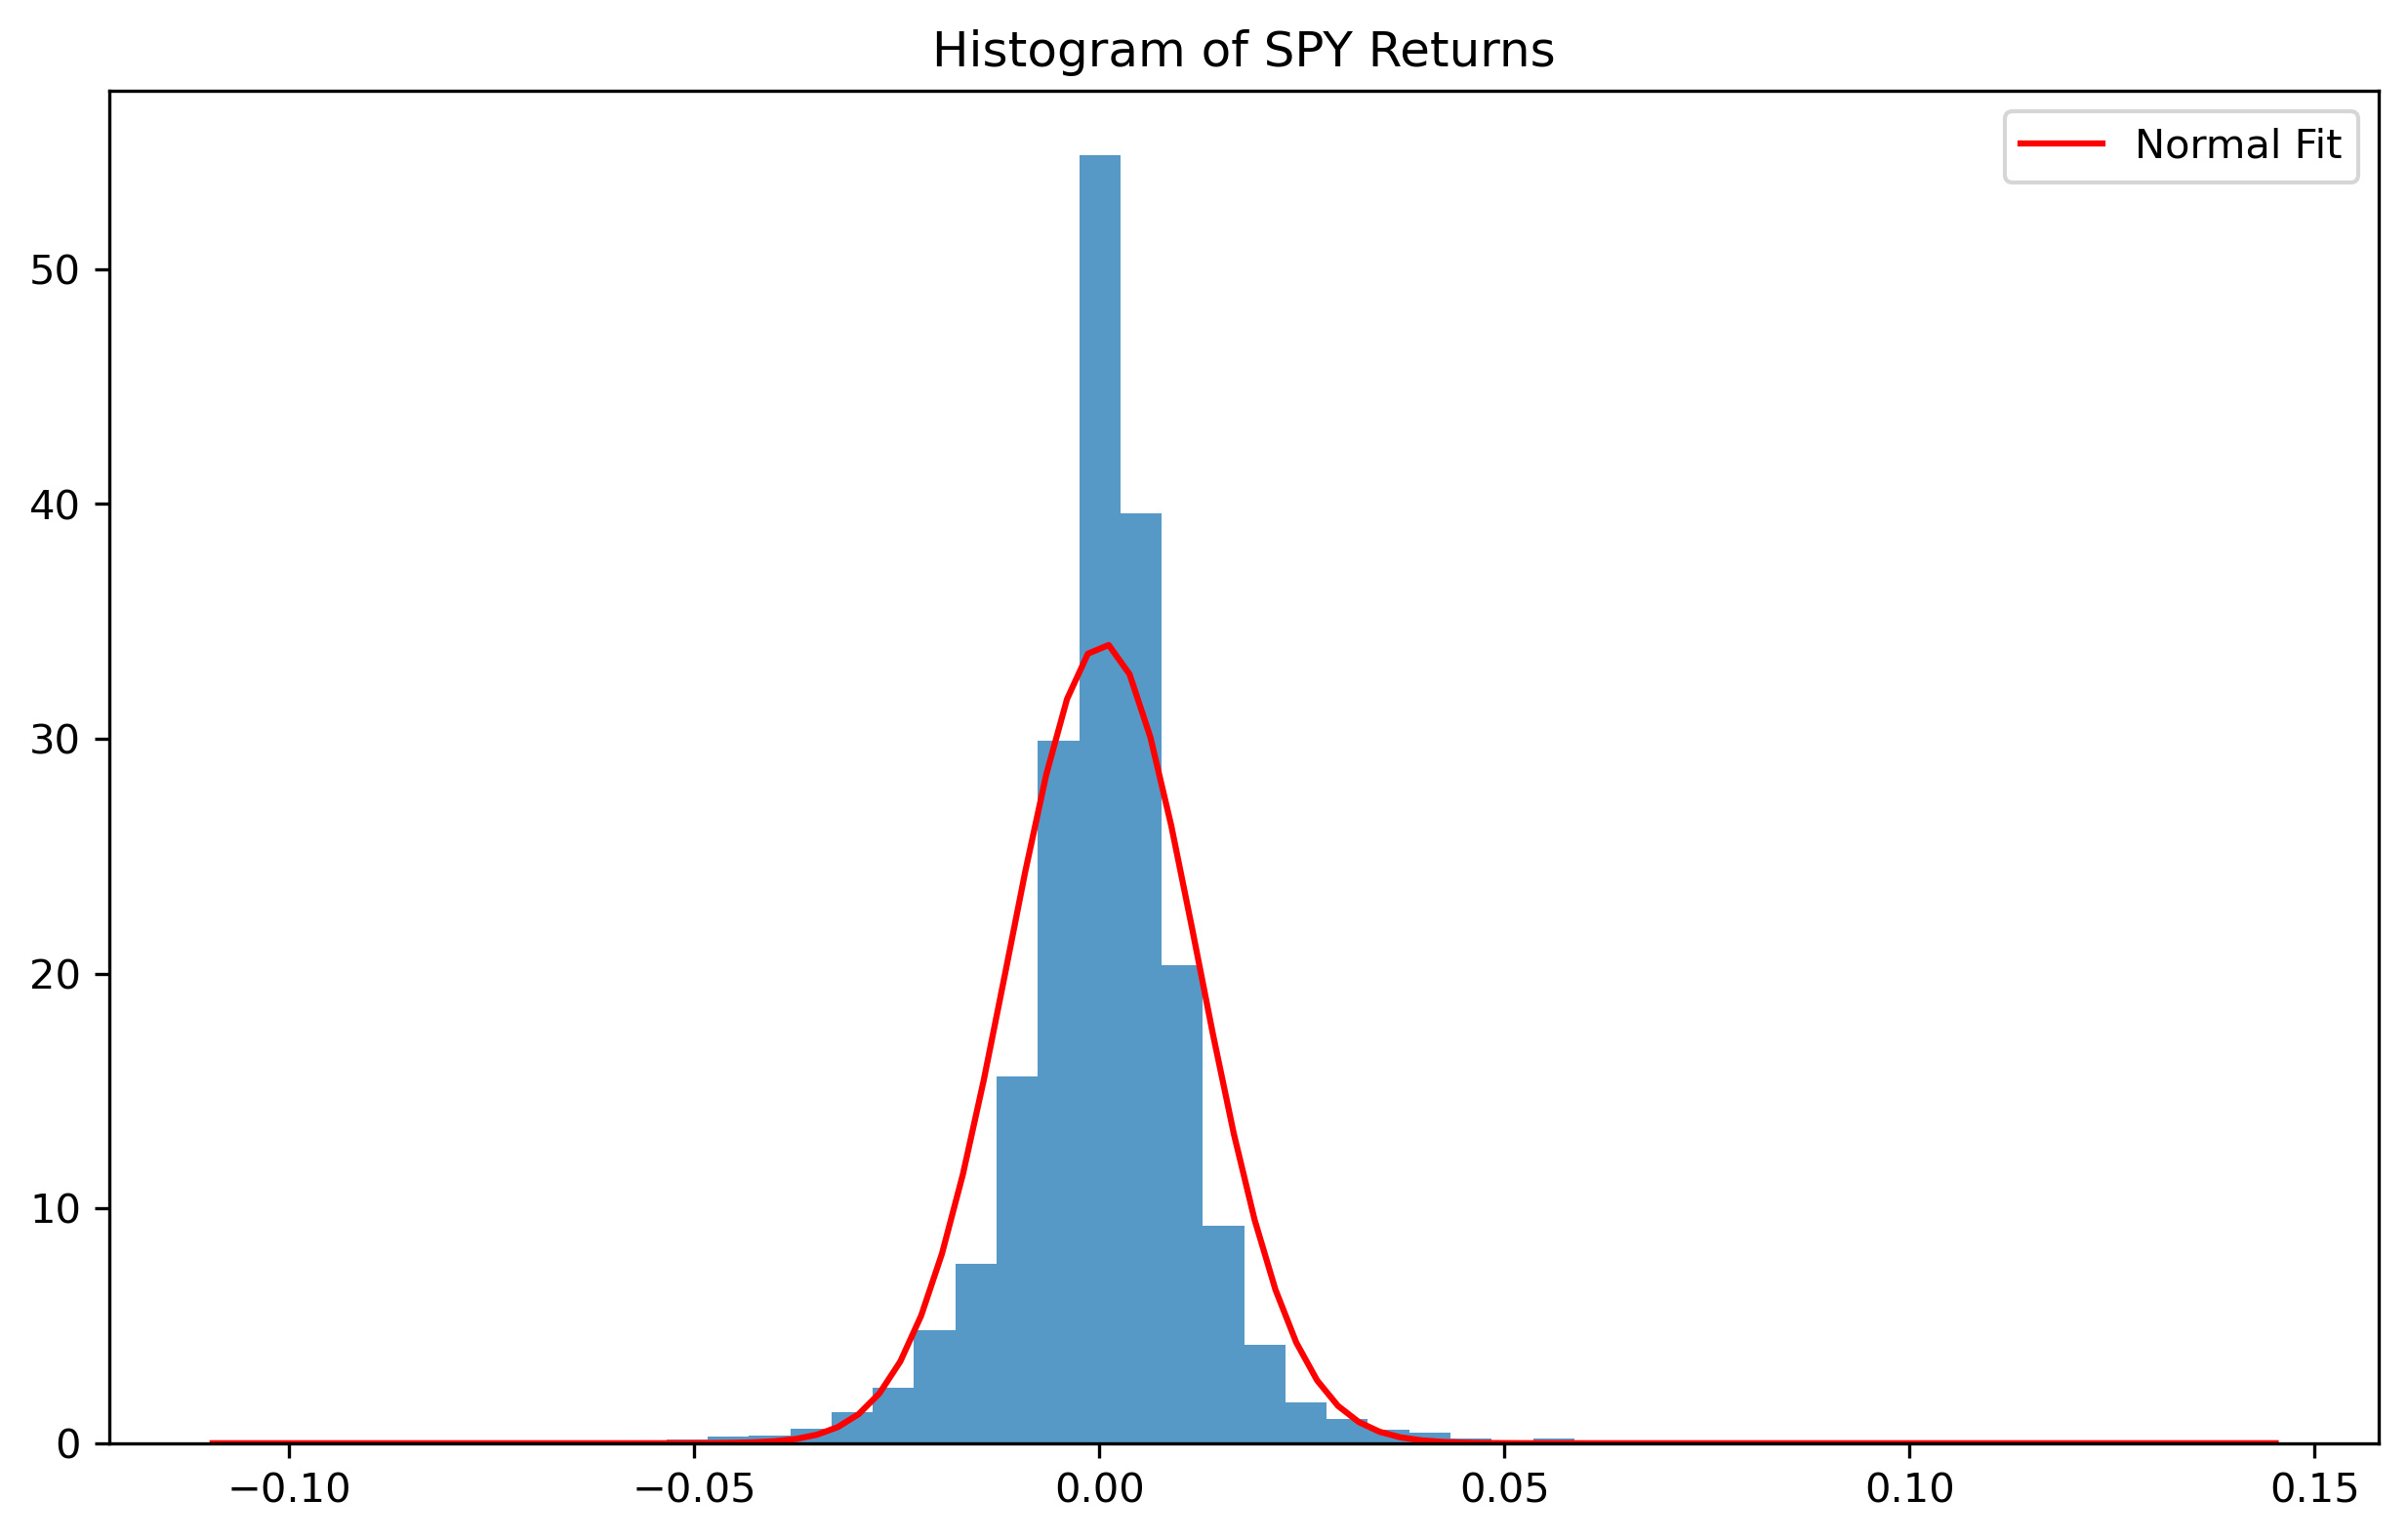

In [14]:
# q8
selected_etf = 'SPY'
etf_returns = daily_returns[selected_etf]

summary_stats = etf_returns.describe()
kurtosis_value = etf_returns.kurtosis()
skewness_value = etf_returns.skew()

robust_analysis_results = summary_stats.to_frame()
robust_analysis_results.loc['Kurtosis'] = kurtosis_value
robust_analysis_results.loc['Skewness'] = skewness_value
robust_analysis_results.to_csv("robust_analysis_results.csv", index=True)

plt.figure(figsize=(10,6), dpi=300)
plt.hist(etf_returns, bins=50, alpha=0.75, density=True)
x = np.linspace(etf_returns.min(), etf_returns.max(), 100)
plt.plot(x, norm.pdf(x, etf_returns.mean(), etf_returns.std()), 'r-', label='Normal Fit')
plt.title(f'Histogram of {selected_etf} Returns')
plt.legend()
plt.show()

In [15]:
# q9
risk_free_rate = 0.02 / 252  # Assuming 2% annualized RF rate converted to daily
sharpe_ratios = (daily_returns.mean() - risk_free_rate) / daily_returns.std()
sharpe_ratios.to_csv("sharpe_ratios.csv", index=True)
print(sharpe_ratios)

Ticker
DBV    -0.009583
IWM     0.022836
MTUM    0.044210
SPY     0.033000
VTV     0.028476
VUG     0.035614
VXX    -0.024031
XLB     0.022796
XLC     0.034054
XLE     0.021476
XLF     0.017351
XLI     0.026344
XLK     0.024400
XLP     0.023458
XLRE    0.021259
XLU     0.022823
XLV     0.027611
XLY     0.028337
dtype: float64


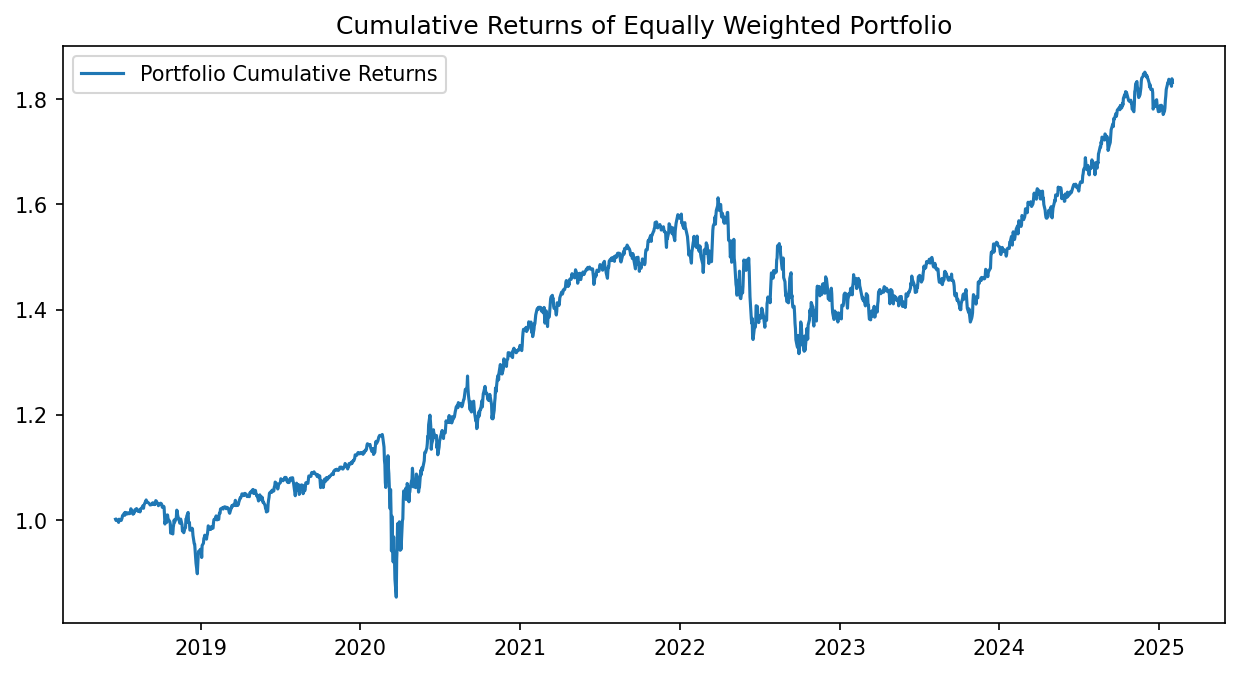

In [16]:
# q10
num_etfs = len(daily_returns.columns)
weights = np.ones(num_etfs) / num_etfs
portfolio_returns = daily_returns @ weights
cumulative_returns = (1 + portfolio_returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()

max_drawdown_df = pd.DataFrame({'Max Drawdown': [max_drawdown]})
max_drawdown_df.to_csv("max_drawdown.csv", index=False)

plt.figure(figsize=(10,5), dpi=150)
plt.plot(cumulative_returns, label='Portfolio Cumulative Returns')
plt.title('Cumulative Returns of Equally Weighted Portfolio')
plt.legend()
plt.savefig("cumulative_returns.png", dpi=150)
plt.show()